# Importing the libraries

In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LassoCV 
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

### The dataset has majority of numerical data and 1 categorical data for "Sex"
#### It has 3 sub divisions. That is M (Male), F (Female), and I (Infants)

In [63]:
#load the dataset
df = pd.read_csv("D:/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### The dataset appears to have a total of 4177 rows and 9 columns.

In [65]:
df.shape

(4177, 9)

# Preporcessing

### The dataset appears to have all the information intact and as 4177 non null out of 4177 rows.
### There are a total of 8 columns with float data type and 1 coulum with Object datatype in features and the target variable "Rings" has Integer datatype

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Plot to compare the gender category

#### It appears "Male" are the majority and "Females" are relatively lesser than "Infants"

<AxesSubplot:xlabel='Sex', ylabel='count'>

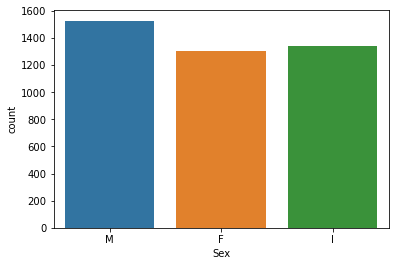

In [67]:
# plotting

sns.countplot("Sex", data=df)

### Comparison between Sex and Rings

#### The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings.
#### From the below graph it appears, the shells cut so far appear to fall under "Female" category having many "Rings"

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

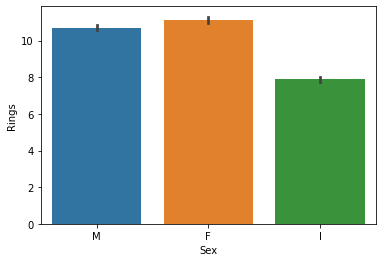

In [68]:
sns.barplot(x="Sex", y="Rings", data=df)

# Encoding the feature "Sex"

## Since the order of the data is not important, we will be using "get_dummies" to convert the categorical to numerical values.
### It is also used as we have only 3 unique sub categories in "Sex". Hence more number of columns will not be generated

In [69]:
dummies = pd.get_dummies(df["Sex"])

In [70]:
df = pd.concat([dummies, df], axis=1)

In [71]:
df = df.drop("Sex", axis=1)
df

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...,...
4172,1,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Let's now observe the stats of the dataset

### All the values are accounted for and has no missing values

#### Difference between mean and std also seems fine . However we will check for skewness if any in the further steps

In [72]:
df.describe()

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.312904,0.321283,0.365813,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.463731,0.467025,0.481715,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.000000,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.000000,0.000000,0.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,1.000000,1.000000,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,1.000000,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Distribution of all the columns in the dataset


### All the features seem to be a little less normal distributed. So let us try to identify and remove outliers to check if the output can be imporved

### If we ignore the categorical values and dependent variable, rest of all the features 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight' have skewness to some extent

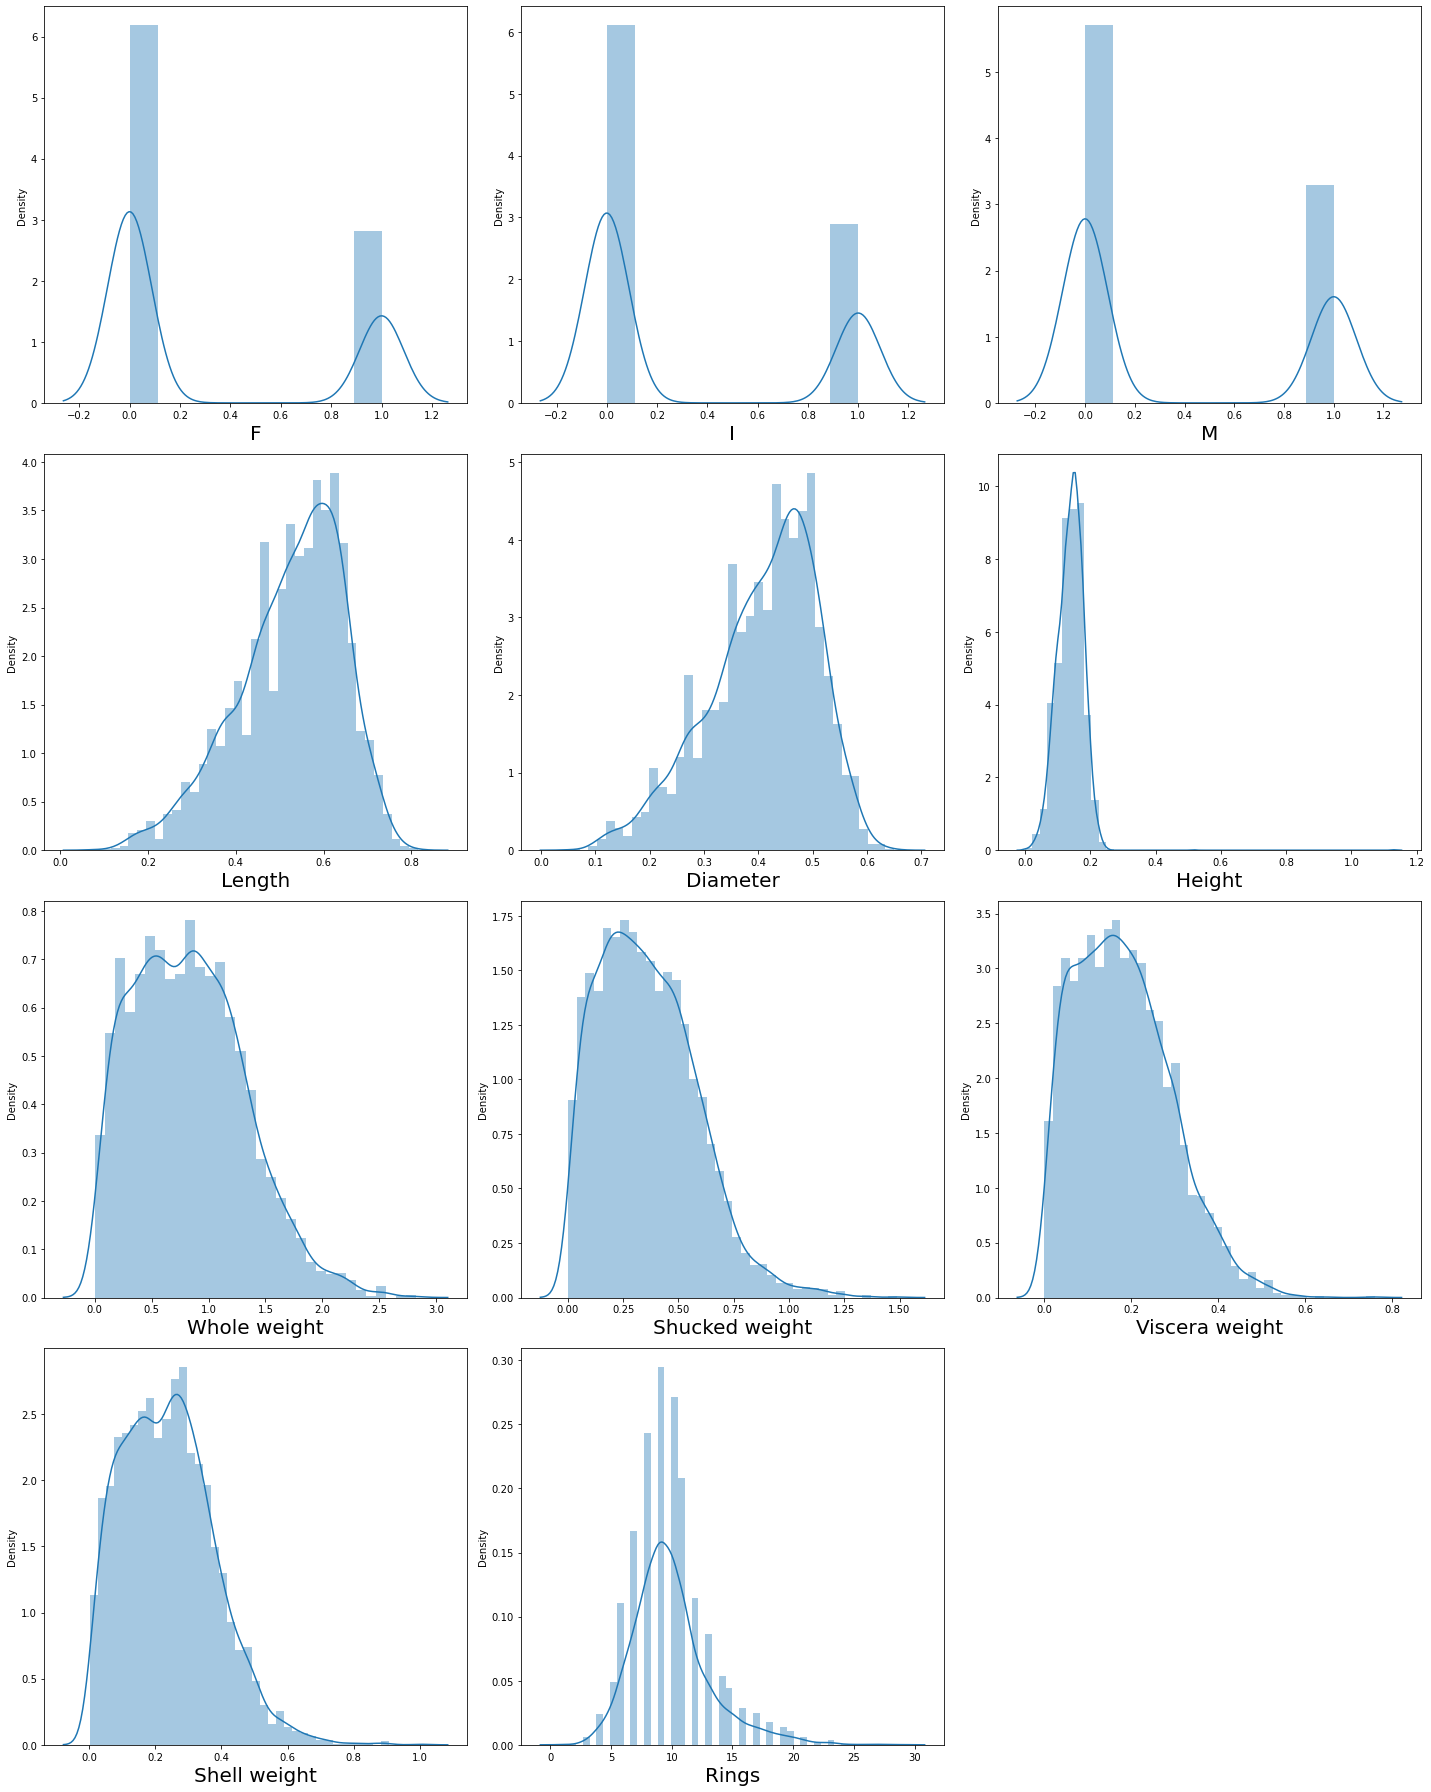

In [73]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=11:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Identifying the column names to pass it for outlier removal

In [74]:
df.columns

Index(['F', 'I', 'M', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# Applying Z-score to identify and remove outliers

### It appears the dataset has removed / reduced outliers to some extent

### The stats show reduction of total values in the dataset to minimal extent only

In [75]:
from scipy.stats import zscore

z_score = zscore(df[['Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,0.312684,0.324437,0.362880,0.522090,0.406308,0.138530,0.808404,0.350172,0.176579,0.233142,9.901567
std,0.463643,0.468221,0.480889,0.115709,0.095848,0.037001,0.457321,0.205827,0.103336,0.129482,3.164617
min,0.000000,0.000000,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000
25%,0.000000,0.000000,0.000000,0.450000,0.350000,0.115000,0.441000,0.185375,0.092875,0.130000,8.000000
50%,0.000000,0.000000,0.000000,0.540000,0.420000,0.140000,0.790750,0.332000,0.168500,0.230000,9.000000
75%,1.000000,1.000000,1.000000,0.610000,0.480000,0.165000,1.134750,0.494000,0.247000,0.320500,11.000000
max,1.000000,1.000000,1.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,29.000000


### Percentage of Data Loss

#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In this case its approximately 0.80% and not much of data is lost

In [76]:
# Percentage data loss:

loss_percent = (4117-4084)/4117*100
print(loss_percent)

0.801554529997571


# Distribution of all the columns in the dataset (post z-score)

#### Ignoring the categorical values, the dataset is not perfectly normally distributed but its appears to be normally distributed than before.

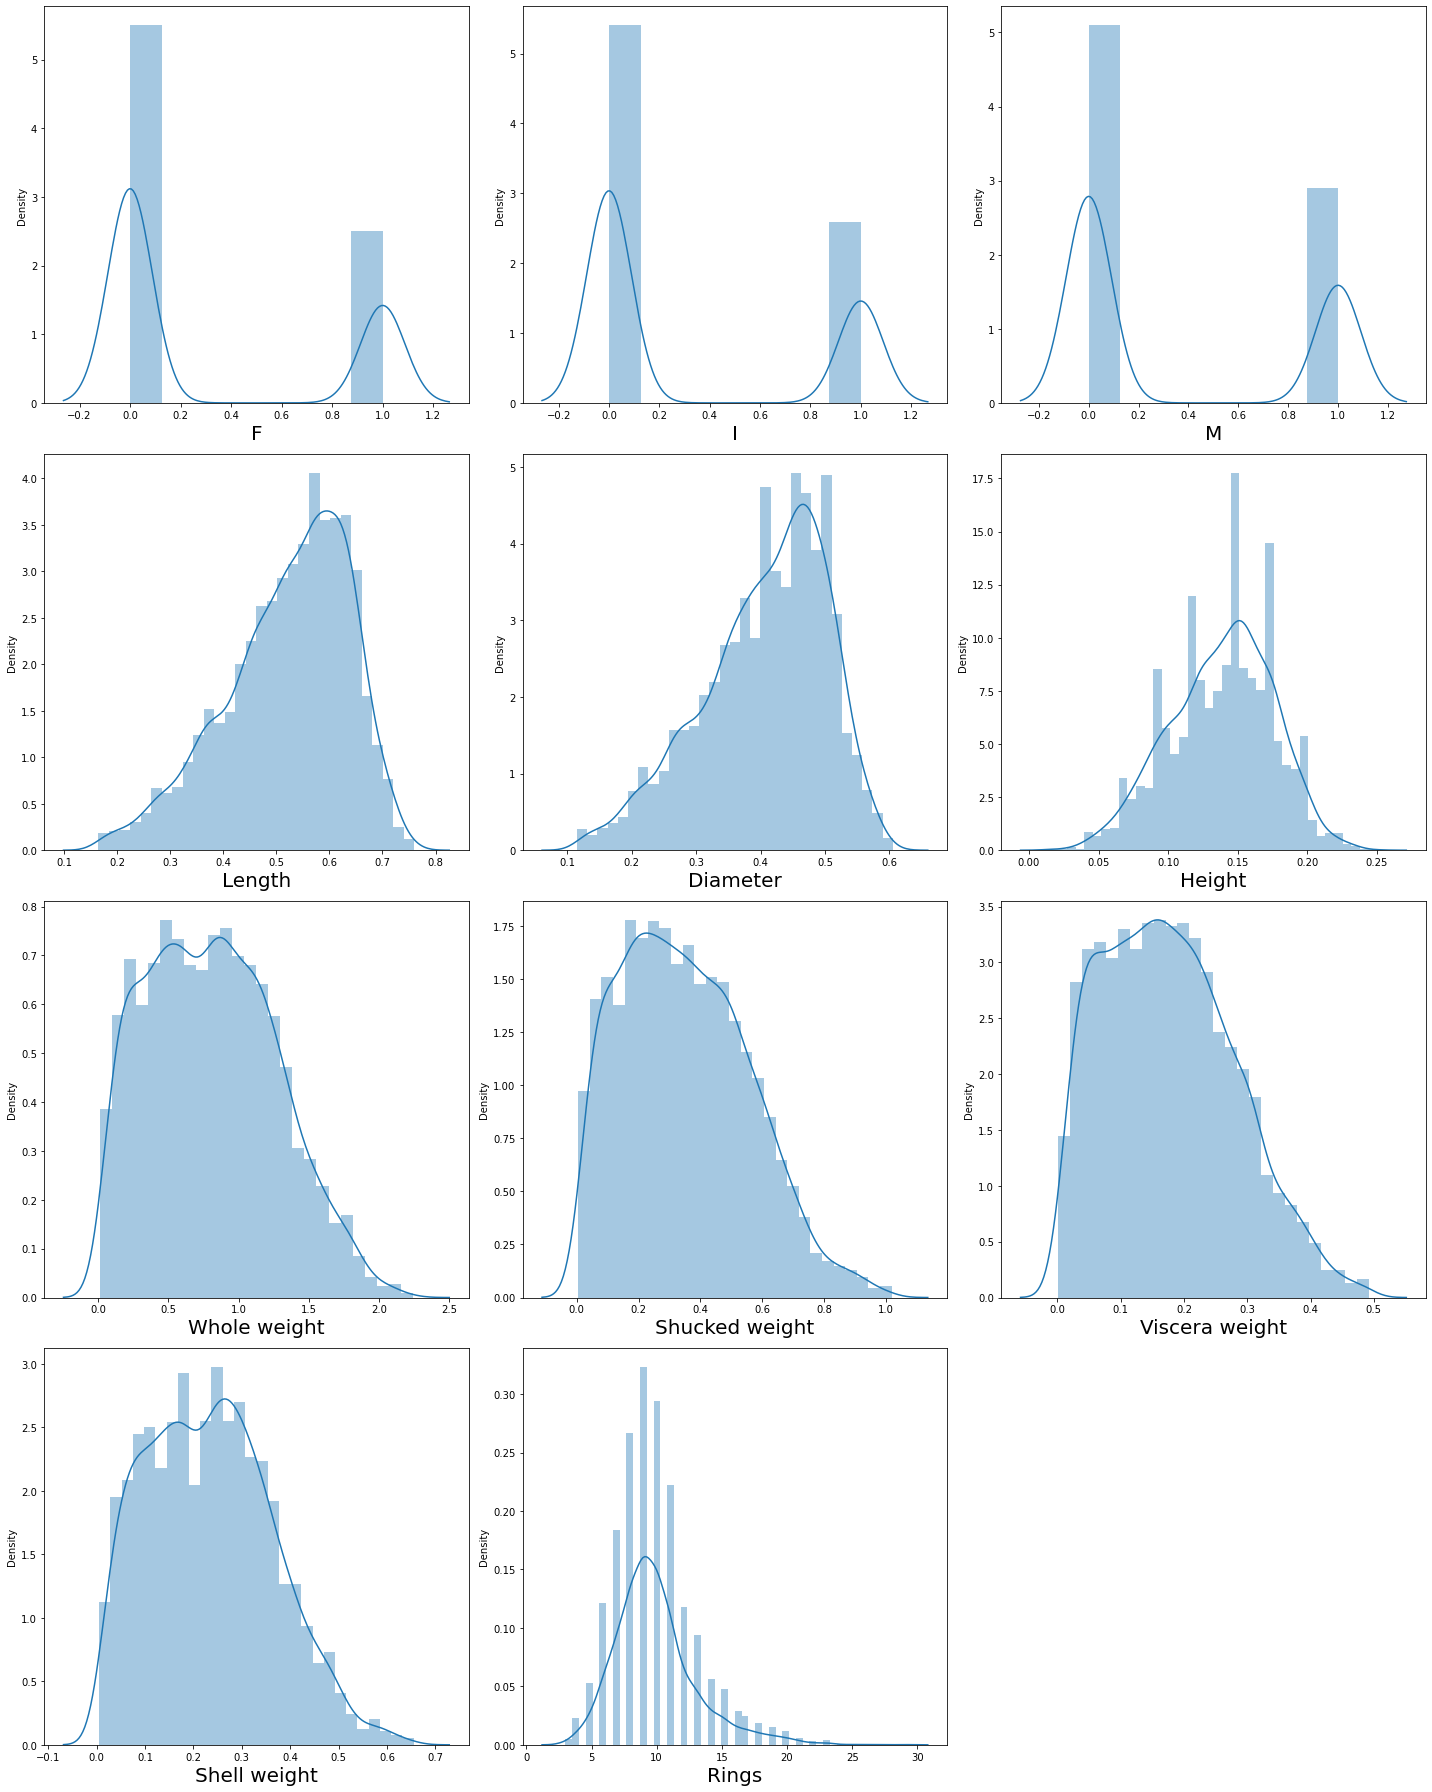

In [77]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=11:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Correlation of the features with the dependent variable "Rings"

#### The values are high for all features and its show the high collinearity with each other

In [78]:
corr_matrix = df.corr()
corr_matrix["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.618991
Height            0.597622
Diameter          0.561048
Length            0.541905
Whole weight      0.533165
Viscera weight    0.497026
Shucked weight    0.413036
F                 0.248831
M                 0.177976
I                -0.429190
Name: Rings, dtype: float64

## Lets us now examine correlation using a "heatmap" for further clarification

### If we look at the middle most area that has values greater than 0.6, 0.8 and upto 1

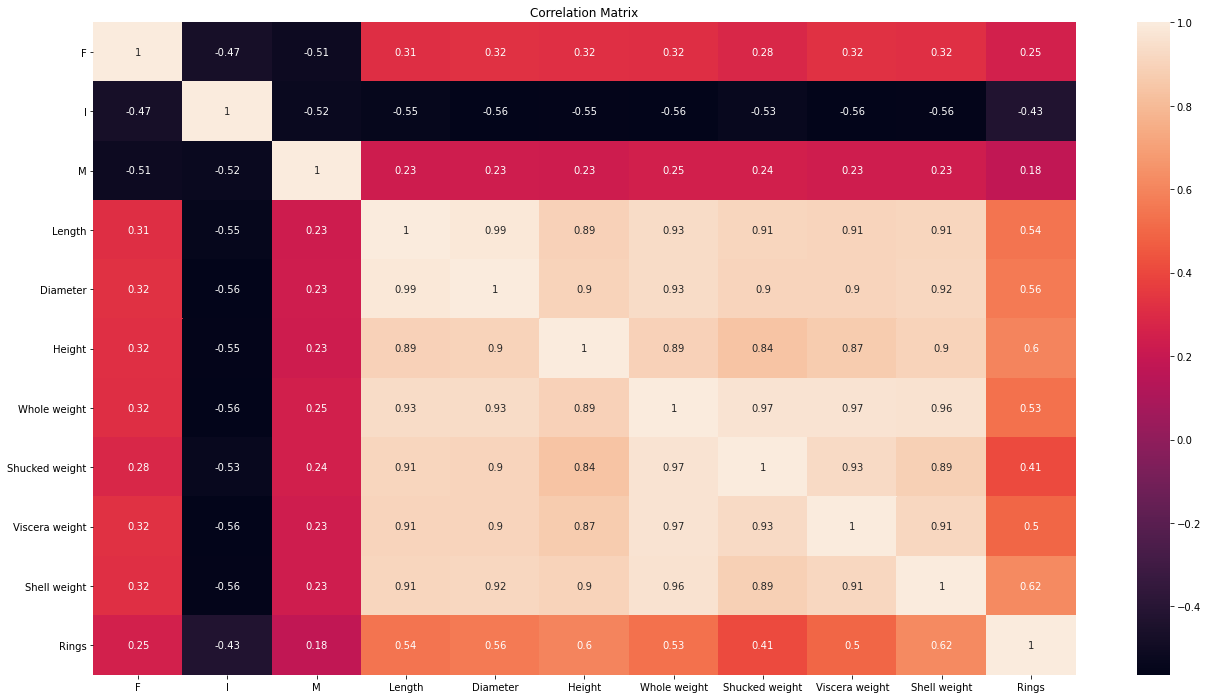

In [79]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

In [80]:
x = df.drop(columns = ["Rings"], axis=1)
y = df["Rings"]

### Check for skewness of data

#### The data is not skewed and it falls within the accepted range

#### Columns "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight" and "Shell weight" have skewness amongst each other.

#### Let's now proceed to further remove/ reduce the skewness for better results

In [81]:
x.skew()

F                 0.808415
I                 0.750283
M                 0.570558
Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
dtype: float64

### Storing the list of features having skewness in a variable "features". It's would be easier to pass it through at one go

In [82]:
features = ['Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight']

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 

In [83]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

<IPython.core.display.Javascript object>

## Power Transformer (yeo-Johnson)

### To reduce the skewness to some extent, I have used a Power Transformer technique 
### Since we have both positive and negative values in skewness, I have used "Yeo-Johnson" technique

In [84]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method="yeo-johnson")

x[features] = scaler.fit_transform(x[features].values) 

x[features]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.696161,-0.554594,-1.168296,-0.588451,-0.550030,-0.698406,-0.598766
1,-1.420433,-1.409424,-1.289091,-1.362331,-1.319429,-1.341090,-1.340159
2,-0.058200,0.025024,-0.142854,-0.199039,-0.371744,-0.251272,-0.096466
3,-0.811094,-0.554594,-0.409259,-0.583488,-0.601436,-0.550573,-0.555262
4,-1.538442,-1.482282,-1.525912,-1.422319,-1.386634,-1.459221,-1.489465
...,...,...,...,...,...,...,...
4172,0.278101,0.378060,0.698142,0.262973,0.209484,0.681527,0.208481
4173,0.534430,0.257350,-0.142854,0.426834,0.528748,0.464194,0.295413
4174,0.640858,0.693557,1.921334,0.839694,0.898004,1.082325,0.641018
4175,0.916960,0.825397,0.269701,0.683156,0.920420,0.867974,0.555688


## Check the skewness of the feature dataset

### The skewness seems to have reduced considerably (excluding the categorical features)

In [85]:
x.skew()

F                 0.808415
I                 0.750283
M                 0.570558
Length           -0.084034
Diameter         -0.080768
Height           -0.016167
Whole weight     -0.018290
Shucked weight    0.020227
Viscera weight    0.034242
Shell weight      0.017040
dtype: float64

# Lets plot a distribution graph to view the feature data post transformation

### The data appears to be even better than before and looks more normally distributed

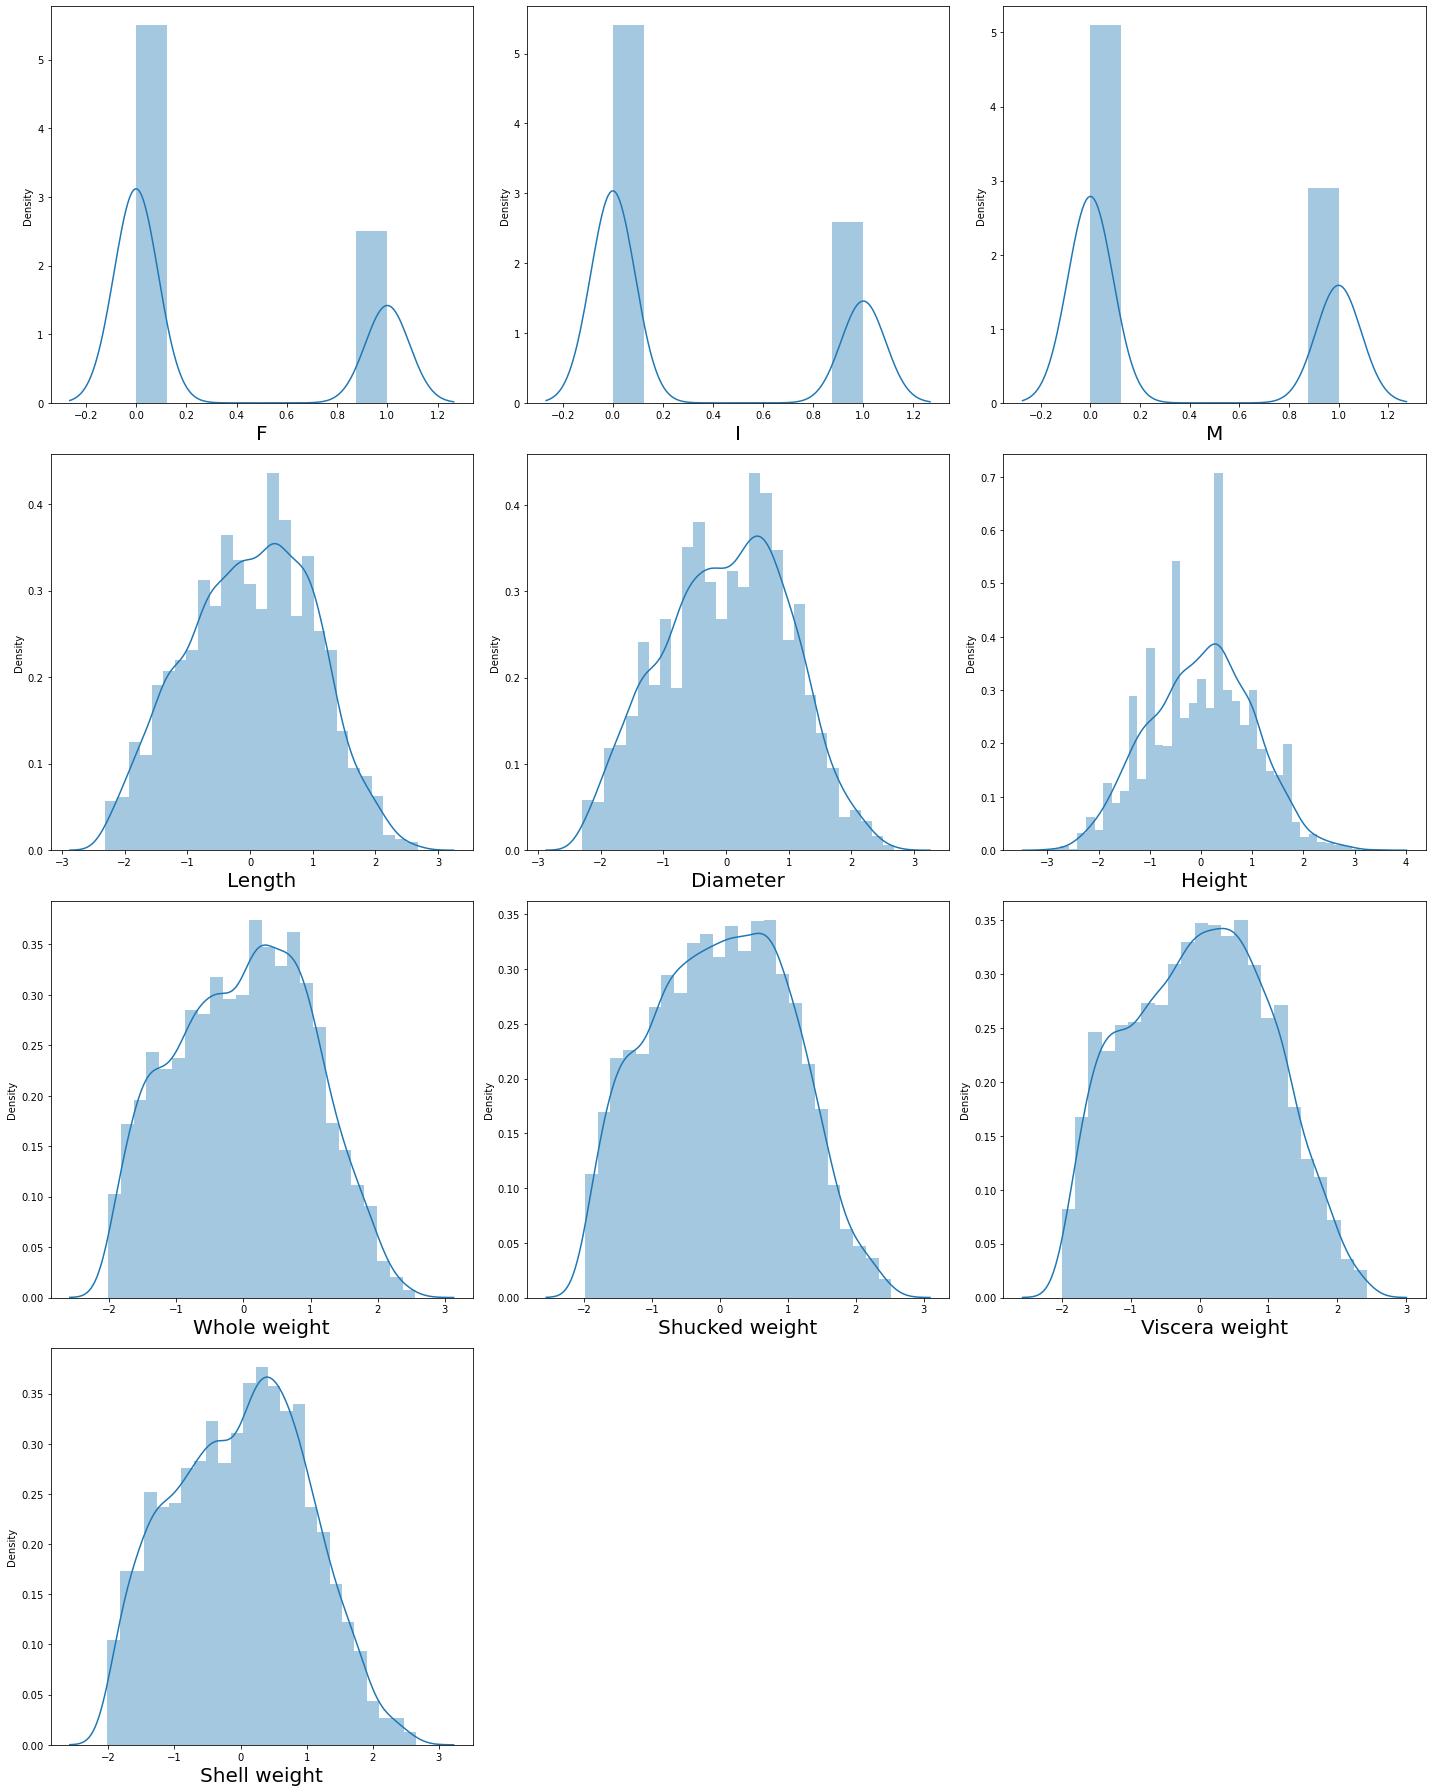

In [87]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in x:
    if plotnumber <=11:
        ax = plt.subplot(4,3, plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Finding variance inflation factor in each scaled column¶
### This gives us relationship between feature vs feature and we can drop if necessary to avoid multicolinearity
### From the below observation, it appears all the columns have multicolinearity

#### I have not considered dropping any features as by dropping features I got less accuracy during model building. So to improve / to keep the model consistant I have continued the further steps without dropping the features

In [88]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,inf,F
1,inf,I
2,inf,M
3,38.821662,Length
4,40.571359,Diameter
5,6.557043,Height
6,104.977669,Whole weight
7,27.500255,Shucked weight
8,16.750972,Viscera weight
9,22.992439,Shell weight


# split the dataset into train and test data set

In [89]:

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)


# Create multi output regression models



### 1) DecisionTreeRegressor

In [107]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  2.0848287112561175
Mean Squared Error (MSE):  9.285481239804241
Root Mean Squared Error (RMSE):  3.047208762097576


### 2) RandomForestRegressor

In [108]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9337518606016035
Mean Absolute Error (MAE):  1.4900489396411094
Mean Squared Error (MSE):  4.369700978792822
Root Mean Squared Error (RMSE):  2.0903829741922464


### 3) XGBRegressor

In [109]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train,y_train)

y_pred = xgb_reg.predict(x_test)

print("Adjusted R2 squared : ",xgb_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9563077377778314
Mean Absolute Error (MAE):  1.5450275924427475
Mean Squared Error (MSE):  4.754564617208167
Root Mean Squared Error (RMSE):  2.180496415316514


### 4) AdaBoostRegressor

In [110]:
from sklearn.ensemble import AdaBoostRegressor

adb_reg = AdaBoostRegressor()
adb_reg.fit(x_train,y_train)

y_pred = adb_reg.predict(x_test)

print("Adjusted R2 squared : ",adb_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.2319643015907663
Mean Absolute Error (MAE):  2.4430555863632626
Mean Squared Error (MSE):  8.05476244593581
Root Mean Squared Error (RMSE):  2.8380913385470543


### 5) ExtraTreesRegressor

In [120]:
from sklearn.ensemble import ExtraTreesRegressor

extra_reg = ExtraTreesRegressor()
extra_reg.fit(x_train,y_train)

y_pred = extra_reg.predict(x_test)

print("Adjusted R2 squared : ",extra_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  1.5202202283849917
Mean Squared Error (MSE):  4.503313784665579
Root Mean Squared Error (RMSE):  2.12210126635502


# Cross validation to check if its overfitting¶

In [118]:
from sklearn.model_selection import cross_val_score

In [113]:
scr = cross_val_score(dt_reg, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: -0.16584366505206283


In [114]:
scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

Cross Validation score of RandomForestRegressor model is: 0.42329194416408794


In [115]:
scr = cross_val_score(xgb_reg, x, y, cv=5)
print("Cross Validation score of XGBoostRegressor model is:", scr.mean())

Cross Validation score of XGBoostRegressor model is: 0.3613020884939937


In [116]:
scr = cross_val_score(adb_reg, x, y, cv=5)
print("Cross Validation score of AdaBoostRegressor model is:", scr.mean())

Cross Validation score of AdaBoostRegressor model is: -0.2321264711088063


In [117]:
scr = cross_val_score(extra_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

Cross Validation score of ExtraTreesRegressor model is: 0.41625444628966174


# Selecting the best ML model for this dataset

#### From the below, it appears RandomForestRegressor is the appropriate algorithm for this scenario

#### The alogorithms DecisionTreeRegressor and AdaBoostRegressor have a negative CV Score. Hence we will not consider these 2 models. These models are not fit for the following type of dataset

| Models used | Adjusted R2 score | CV score| Difference output |
| --- | --- | --- |---|
| DecisionTreeRegressor | 100 | -0.165843665 | 100.1658437 |
| RandomForestRegressor | 0.933751861 | 0.423291944 | 0.510459916 |
| XGBoostRegressor | 0.956307738 | 0.361302088 | 0.595005649 |
| AdaBoostRegressor | 0.231964302 | -0.232126471 | 0.464090773 |
| ExtraTreesRegressor | 100 | 0.416254446 | 99.58374555 |


# Hyper Parameter Tuning
### Let us try to tune the proposed model (RandomForestRegressor) to improve the outcome
#### The "paramaters" have been selected from the skicit library and I have considered 4 paramaters

## [My system doesn't support much of heavy processing, I initially used 6 parameters and later reduced to 4 only]

In [137]:
parameters = {"criterion":["mse", "mae"],
              "max_features": ["auto", "sqrt", "log2"],
              "max_depth": [2,4],
              "min_samples_split":[2,4],
             }

### GridSearchCV is used to tune the parameters by fitting the same to the training dataset

In [138]:
GCV = GridSearchCV(RandomForestRegressor(), parameters, cv=5)

<IPython.core.display.Javascript object>

In [139]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4]})

In [141]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 4}

### Rebuild the model using the appropriate params we recieved from best_params_

In [143]:
mod = RandomForestRegressor(criterion="mse", max_depth=4, max_features="auto", min_samples_split=4)

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
pred

array([12.02075169, 10.56072294,  9.54137065, ..., 10.90346372,
        6.45505738, 10.25954332])

# Saving the model (using joblib)

In [145]:
import joblib
joblib.dump(mod,"Abalone_Dataset.pkl")

['Abalone_Dataset.pkl']

# Loading the saved model

In [146]:
model = joblib.load("Abalone_Dataset.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

,0
0,12.020752
1,10.560723
2,9.541371
3,13.126506
4,11.447775
...,...
1221,11.160042
1222,8.958729
1223,10.903464
1224,6.455057
